In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**TensorFlow** is an open source framework developed by Google researchers to run machine learning, deep learning and other statistical and predictive analytics workloads.

Simple definition: cv2 or open cv is an image-processing library. Here, we are using it for implementing basic stuffs like changing the color space[BGR, RGB etc] or reading an image etc.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import cv2
import PIL

# Used to create our own vgg model
from tensorflow.keras import Model  # Model = Class

**CV2** : Technical Definition for cv2:
*  CV stands for Computer Vision.
*  OpenCV is the huge open-source library for the computer vision, machine learning, and image processing and now it plays a major role in real-time operation which is very important in today’s systems.
*  By using it, one can process images and videos to identify objects, faces, or even handwriting of a human.

**PIL (Python Imaging Library)**:
*  Python Imaging Library (expansion of PIL) is the de facto image processing package for Python language.
*  It incorporates lightweight image processing tools that aids in editing, creating and saving images.

The basic difference between OpenCV image and PIL image is OpenCV follows BGR color convention and PIL follows RGB color convention and the method of converting will be based on this difference.

vgg(visual geometry group) : Standard deep(refers to number of layers) CNN architecture with multiple layers.

In [ ]:
# Calling a pre-trained vgg(i.e, we are not going to train the vgg) trained on imageNet dataset.

vgg = tf.keras.applications.VGG19(include_top = False, weights = "imagenet")

# include_top parameter specifies whether to include the fully connected layers (top layers) of the VGG19 model.
# imagenet is a dataset consisting of more than 14 million images belonging to nearly 1000 different classes
# applications is a callable module in keras

for layers in vgg.layers:
  print(f"{layers.name} ---> {layers.output_shape}")

80134624/80134624 [==============================] - 0s 0us/step
input_2 ---> [(None, None, None, 3)]
block1_conv1 ---> (None, None, None, 64)
block1_conv2 ---> (None, None, None, 64)
block1_pool ---> (None, None, None, 64)
block2_conv1 ---> (None, None, None, 128)
block2_conv2 ---> (None, None, None, 128)
block2_pool ---> (None, None, None, 128)
block3_conv1 ---> (None, None, None, 256)
block3_conv2 ---> (None, None, None, 256)
block3_conv3 ---> (None, None, None, 256)
block3_conv4 ---> (None, None, None, 256)
block3_pool ---> (None, None, None, 256)
block4_conv1 ---> (None, None, None, 512)
block4_conv2 ---> (None, None, None, 512)
block4_conv3 ---> (None, None, None, 512)
block4_conv4 ---> (None, None, None, 512)
block4_pool ---> (None, None, None, 512)
block5_conv1 ---> (None, None, None, 512)
block5_conv2 ---> (None, None, None, 512)
block5_conv3 ---> (None, None, None, 512)
block5_conv4 ---> (None, None, None, 512)
block5_pool ---> (None, None, None, 512)


(224, 224, 3): 1st 2 numbers represent the dimensions(i.e, length and breadth) of the feature matrix and 3rd number represents the number of filters/feature matrices the image is getting splited into based on patterns, edges recognition etc.

# VGG
*  The main idea behind VGG is to use very small convolutional filters (3x3) in a deep architecture to learn features hierarchically from low-level to high-level representations.
* It is a pre-trained CNN which is used for extracting content and style features.
*  Stacking multiple layers of 3x3 filters can lead to a deeper network while maintaining a small receptive field.
*  A deeper network allows the model to learn more complex features and representations from the data.

![alter text](https://www.researchgate.net/profile/Clifford-Yang/publication/325137356/figure/fig2/AS:670371271413777@1536840374533/llustration-of-the-network-architecture-of-VGG-19-model-conv-means-convolution-FC-means.jpg)

Ex: Each Convolutional Layer detects:
*  conv1 : Edges and Blobs
*  conv3 : Texture
*  conv 5 : Object Parts
*  fc : Object Classes

Network Depth: The VGG network architecture is characterized by its depth. The original VGG model contains 16-19 layers, making it significantly deeper than previous CNN architectures at that time (such as AlexNet, which had 8 layers). This depth was one of the key factors contributing to its superior performance.

**Basic CNN Architecture**: Image ---> Convolutional Layer ---> Activation Layer ---> Pooling layer(Max pooling) ---> FC Layer ---> Final Output Layer

*  conv(Convolutional Layer): The first layer in a CNN.  It applies a set of filters, also called convolutional kernels, to the input image. These filters detect different features like edges, textures, and patterns.

*  pool(pooling layer) :  Next, a pooling layer reduces the spatial dimensions of the previous layer's output. It does this by selecting the most important information from a local neighborhood. The pooling operation can be max pooling, which selects the maximum value, or average pooling, which computes the average value.

*  fc : Fully-Connected layer : Multiplies the input by a weight matrix and then adds a bias vector

*  predictions: final output

## Gram Matrix


*  Style : Correlation btw shapes, color distributions, texture of image etc.

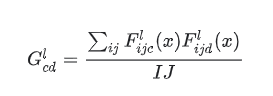

Gram Matrix is used to find the correlation between 2 filters(or features or channels).It is commonly used in style transfer algorithms and can help capture the texture or style information of an image.

![alter text](https://i.ytimg.com/vi/Elxnzxk-AUk/mqdefault.jpg)

**How a Gram Matrix is Genearted?**
*  When an image is fed to the DL model, the **features are stored in the form of feature maps(fm)**
*  Each Feature Map consist of 1 style feature like(and all of them are independent of each other):
   * edges
   * lines
   * texture
   * dots
   * curves
   * patterns etc.
*  On performing deep conv on them, we can get higher-level features like shapes, objects etc.
*  **NOTE:** The degree of correlation(corr) btw these fm's gives the style of image. This corr can be calculated using dot product.
*  To perform dot product, these feature matrices are converted into vectors(i.e, rows in above picture) and multiplied with its transpose to get a **Gram Matrix**(which represents the style of image)[Denoted by G in above image]

In [ ]:
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc, bijd->bcd', input_tensor, input_tensor)
  # Since in DL, we deal everything with batches, we introduce 'b' infront of the patterns ijc, ijd, cd.
  ''' * bijc, bijd : Input Tensors
      * b : batch_size
      * i, j : Spatial Dimensions(Width and Height)
      * c : No. of channels
      * d : Different channel index(i.e, d instead of c)'''

  gram_matrix = tf.expand_dims(result, axis=0) # Adds a batch to the outer layer
  input_shape = tf.shape(input_tensor)
  i_j = tf.cast(input_shape[1]*input_shape[2], tf.float32)  # i_j = just a variable name
  # cast : change the datatype of the input_shape(which is of type = tensor)to float for more precision and also 0 = batch which we added
  # input_shape[1] = i and input_shape[2] = j

  return gram_matrix/i_j

*  linalg(Linear Algebra) : A tf library
*  einsum function is a powerful tool in TensorFlow that allows for easy summation and contraction of tensors based on Einstein summation notation. calculates the dot product of the input tensor with itself for each batch and spatial location but with different channel indices c and d. This results in a matrix of shape [batch_size, channels, channels].

In [ ]:
def load_vgg():
  vgg = tf.keras.applications.VGG19(include_top=True, weights=None)
  # weights = none because we don't want to download the vgg 19 weights everytime we run this cell.

  vgg.load_weights('/content/drive/MyDrive/Neural_Style_Transfer/vgg19_weights_tf_dim_ordering_tf_kernels.h5')
  #vgg class has a function called load_weights which takes a path where weights are stored

  vgg.trainable = False
  content_layers = ['block4_conv2']
  style_layers = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']
  # 1st layers of block_conv layers are choosed because they have basic features like edges, lines, patterns etc. That's why we keep them in style_layers list

  content_output = vgg.get_layer(content_layers[0]).output # [0] since there is only 1 item in content_layers list
  style_output = [vgg.get_layer(style_layer).output for style_layer in style_layers] # style_output is a list
  # vgg class also has a function called get_layer

  gram_style_output = [gram_matrix(output_) for output_ in style_output]
  '''Here, we pass every item, of the style_output list to the gram matrix function which produces a gram matrix and each iterable value
   (i.e, 'output_') is appended to the gram_style_output list'''

  model = Model([vgg.input], [content_output, gram_style_output])
  return model

## We define Content Layers as "**block4_conv2**"
## The Style Layers are "**block1_conv1**", "**block2_conv1**", "**block3_conv1**", "**block4_conv1**", "**block5_conv1**"

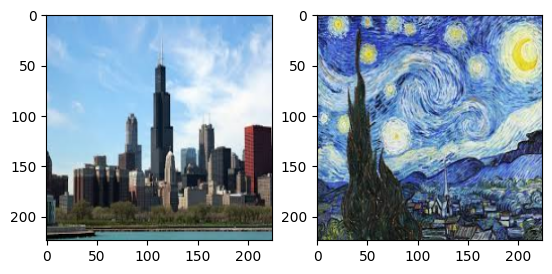

In [ ]:
%matplotlib inline

content_image = cv2.resize(cv2.imread('/content/drive/MyDrive/Neural_Style_Transfer/content1.jpg'), (224, 224))
content_image = tf.image.convert_image_dtype(content_image, tf.float32)

style_image = cv2.resize(cv2.imread('/content/drive/MyDrive/Neural_Style_Transfer/style1.jpg'), (224, 224))
style_image = tf.image.convert_image_dtype(style_image, tf.float32)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(np.array(content_image), cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(np.array(style_image), cv2.COLOR_BGR2RGB))

plt.show()

*  The **cv2.resize**: We use it here because vgg is basically trained with images of 224 x 224 dimensions. It is commonly used in computer vision tasks to preprocess images before feeding them into machine learning models. Resizing an image involves adjusting its dimensions while preserving its aspect ratio.

*  **cv2.imread** is a function provided by the OpenCV library (cv2) that allows you to read an image file into memory. It supports various image file formats such as JPEG, PNG, BMP, etc. Once an image is loaded using imread, it can be manipulated or processed further using OpenCV's functions.

*  **tf.image.convert_image_dtype**: Used to convert the data type of an image. It is often used in machine learning applications, where the input image needs to be in a specific data type for proper processing.

*  For instance, when working with deep learning models in TensorFlow, it is common to convert the image data type to float32 and normalize the pixel values to a range between 0 and 1. This conversion is important to ensure numerical stability and to align with the model's input requirements.

*  By using tf.image.convert_image_dtype, you can convert the data type of an image tensor to the desired type, such as float32, uint8, etc., and normalize the pixel values accordingly.

*  **plt.subplot** is a function provided by the Matplotlib library, often used for creating subplots in a figure. Subplots allow you to display multiple plots or images within a single figure window, arranged in a grid-like structure.

*  The plt.subplot function takes three arguments: the number of rows, the number of columns, and the index of the specific subplot you want to create. For example, plt.subplot(2, 2, 1) creates a grid with 2 rows and 2 columns and selects the first subplot (top left corner) for plotting.

*  **cv2.cvtColor** is a function provided by the OpenCV library (cv2) used for color space conversion. It allows you to convert an image from one color space to another.

*  Color spaces represent how colors are defined and organized, such as RGB (Red, Green, Blue) or BGR (Blue, Green, Red). Sometimes, you may need to convert images between different color spaces to perform specific operations or work with different libraries that expect a particular color space.

*  For example, if you have an image in the BGR color space (commonly used in OpenCV) and you want to convert it to RGB (commonly used in many other libraries and applications), you can use cv2.cvtColor with the appropriate conversion code.

*  **cv2.COLOR_BGR2RGB** OpenCV typically represents images in the BGR color space, where each pixel is represented by three color channels: blue, green, and red. However, other libraries, such as Matplotlib, expect images to be in the RGB color space.

*  So, when you want to display an image loaded with OpenCV in Matplotlib, you can use cv2.cvtColor with cv2.COLOR_BGR2RGB to convert the image from BGR to RGB. This ensures the image is displayed correctly with the appropriate color interpretation.

In [ ]:
#content_image.shape

# CALCULATION OF TOTAL LOSS

In [ ]:
opt = tf.optimizers.Adam(learning_rate=0.01, beta_1 = 0.99, epsilon = 1e-1)

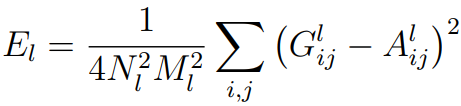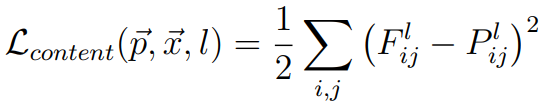

*  L<sub>content</sub>(p, x, l) = Style Loss
*  E<sub>l</sub> = Style Loss

Content Loss : [(Content in Generated Image - Content in actual image)^2] / 2

*  Used to check if the whole content of the original/ actual image is transfered into final generated image or not. The loss must be as minimum as possible. Similarly, for style loss also.

![alter text](https://miro.medium.com/v2/resize:fit:828/0*MYoOY9r_5KKQD7Ld)

Style Loss:

![alter text](https://miro.medium.com/v2/resize:fit:828/format:webp/1*7uVwbMtuRu7QQ6_fDQPQtw.png)

In [ ]:
# Loss Function Calculation

def loss_object(generated_image_style, generated_image_content, actual_image_style, actual_image_content): # Inputs = G, F, A, P
  style_weight = 1e-2 # pow(10, -2)
  content_weight = 1e-1 # pow(10, -1)

  content_loss = tf.reduce_mean((generated_image_content - actual_image_content)**2) # tf.reduce_mean() = Does summation and divides by mean
  style_loss = tf.add_n([tf.reduce_mean((output_ - target_)**2) for output_, target_ in zip(generated_image_style, actual_image_style)]) # add_n adds all elements of the list

  total_loss = content_weight*content_loss + style_weight*style_loss
  return total_loss


*  * style_weight = 1e-2
   * content_weight = 1e-1
*  These default values indicate that the content loss is weighted ten times more than the style loss. This means the generated image will try to retain the content of the original image more strongly than adopting the artistic style of the reference image.

*  If you set style_weight to a higher value, the style of the reference image will have more influence on the final stylized image. Conversely, if you set style_weight to a lower value, the generated image will be more faithful to the content of the original image.

In [ ]:
vgg_model = load_vgg()
content_target = vgg_model(np.array([content_image*255]))[0] # content output of content_image is assigned to content_target
style_target = vgg_model(np.array([style_image*255]))[1]

*  content_image needs to be scaled by 255 before passing it to the model. The [0] index indicates extracting the first output of the VGG model, which corresponds to the feature representation of the content image.

*  Similarly, here we are passing the style_image to the VGG model after scaling it by 255. The [1] index indicates extracting second output of the VGG model, which corresponds to the feature representation of the style image.

In [ ]:
# Basic Training function

def train_step(image, epoch):
  with tf.GradientTape() as tape:
    output = vgg_model(image*255) # Forward passing step
    loss = loss_object(output[1], output[0], style_target, content_target)
  gradient = tape.gradient(loss, image)
  opt.apply_gradients([(gradient, image)]) # apply_gradients function takes a list with a tuple as input
  image.assign(tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)) # To ensure that pixel value ranges between 0 and 1.

  # Just to keep track of loss
  if epoch % 100 == 0:
    tf.print(f"Loss = {loss}") # If we use just print, we get a tensor as output. Hence, we use tf.print to avoid tensor output.


In [ ]:
EPOCHS = 100
image = tf.image.convert_image_dtype(content_image, tf.float32)

# Since vgg.trainable is set to false, we ensure that the content image is being trained with the help of below function.
image = tf.Variable([image])
 # This image is given as list to convert into a batch and converts all these pixels of image become changable thereby enabling back propogation
 # At every back propogation, image variable in the computation graph keeps changing.

for i in range(EPOCHS):
  train_step(image, i)

Loss = 3235905024.0


The image varibale in python is just a variable but in tensorflow comnputational graph ,it(image variable) is a constant because all the pixel values which belong to content image and it is not something with which we can back propogate.

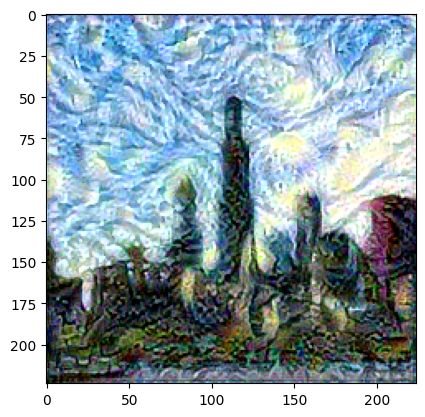

In [ ]:
# Converting tensor(here it is image) into an image which can be displayed using matplotlib.

import PIL
tensor = image*255
tensor = np.array(tensor, dtype=np.uint8)
if np.ndim(tensor)>3:
  assert tensor.shape[0] == 1
  tensor = tensor[0]
tensor =  PIL.Image.fromarray(tensor)
plt.imshow(cv2.cvtColor(np.array(tensor), cv2.COLOR_BGR2RGB))
plt.show()